In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

n = 0

name = ['daily-min-temperatures.csv','daily-total-female-births.csv', 'monthly-sunspots.csv', 'shampoo.csv']
header = ["Temp", "Births", "Sunspots", "Sales"]
series = read_csv(name[n], header=0, index_col=0)
x = np.array(series[header[n]])


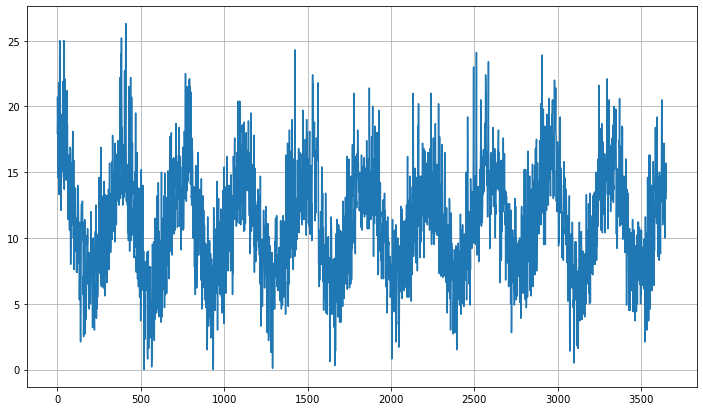

In [3]:
plt.figure(figsize=(12,7))
plt.plot(x)
plt.grid()
plt.show()

In [4]:
def AR(x, lr, p,  max_iter, detrend):
    
    """
    AR Model of order p
    lr #learning rate
    p #model order
    max_iter maximum number of iterations
    """
    
    if detrend == True:
        x = x - np.mean(x)
    

    w = [1 for i in range(p)] #initialize weights
    coef_history = []
    
    error_vector = [] #initialize error vector
    pred_vector = []

    if max_iter > len(x):
        max_iter = len(x) - (p+1) 
        print("Il massimo numero di iterazioni possibili è:", max_iter, "\n")
   
    
    for i in range(max_iter):
        
        coef_history.append([w[j] for j in range(p)])
        
        y_pred = 0
        for j in range(p):
            y_pred += w[j]*x[i-j+p]
        pred_vector.append(y_pred)
        
        error = (x[i+1+p] - y_pred)**2 #Sum Of Squared Errors (in questo caso dovrebbe coincidere con l'MSE perchè sto facendo una sola osservazione come errore => scalare!)
        error_vector.append(error)
        
        #Update weights "w" using gradient descent
        for j in range(p):
            w[j] = w[j] - lr*2*(x[i+1+p]-y_pred)*(-x[i-j+p])

        
    return error_vector, pred_vector, w, coef_history
    
    

In [46]:
%%time
model_order = 5
error_vector, pred_vector, w, coef_history = AR(x, lr = 0.000005, p=model_order, max_iter = 99999, detrend = False)

Il massimo numero di iterazioni possibili è: 3644 

CPU times: user 35.1 ms, sys: 2.42 ms, total: 37.5 ms
Wall time: 36.2 ms


I migliori coefficienti per questo modello sono:

 [0.2897248014402238, 0.18586960076545087, 0.16247705935525095, 0.1643328428821232, 0.1871851970997487] 




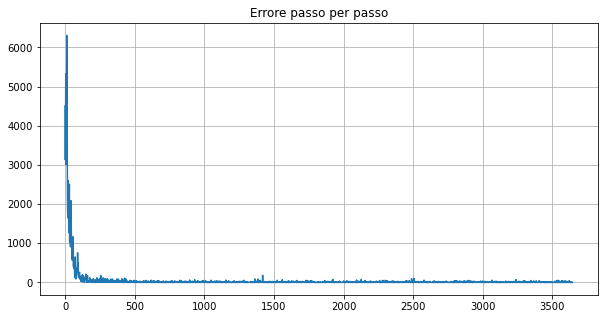


MSE negli ultimi 5 passi dell'allenamento 1.1248098383545577


In [47]:
print("I migliori coefficienti per questo modello sono:\n\n", w, "\n\n")

plt.figure(figsize=(10,5))
plt.grid()
plt.title("Errore passo per passo")
plt.plot(error_vector)
plt.show()
print("\nMSE negli ultimi 5 passi dell'allenamento", np.mean(np.sqrt(error_vector[-5:])))



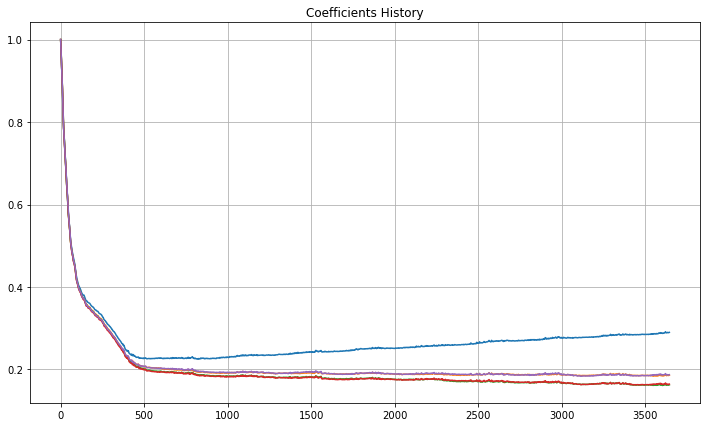

In [48]:
plt.figure(figsize=(12,7))
plt.title("Coefficients History")
plt.plot(coef_history)
plt.grid()
plt.show()

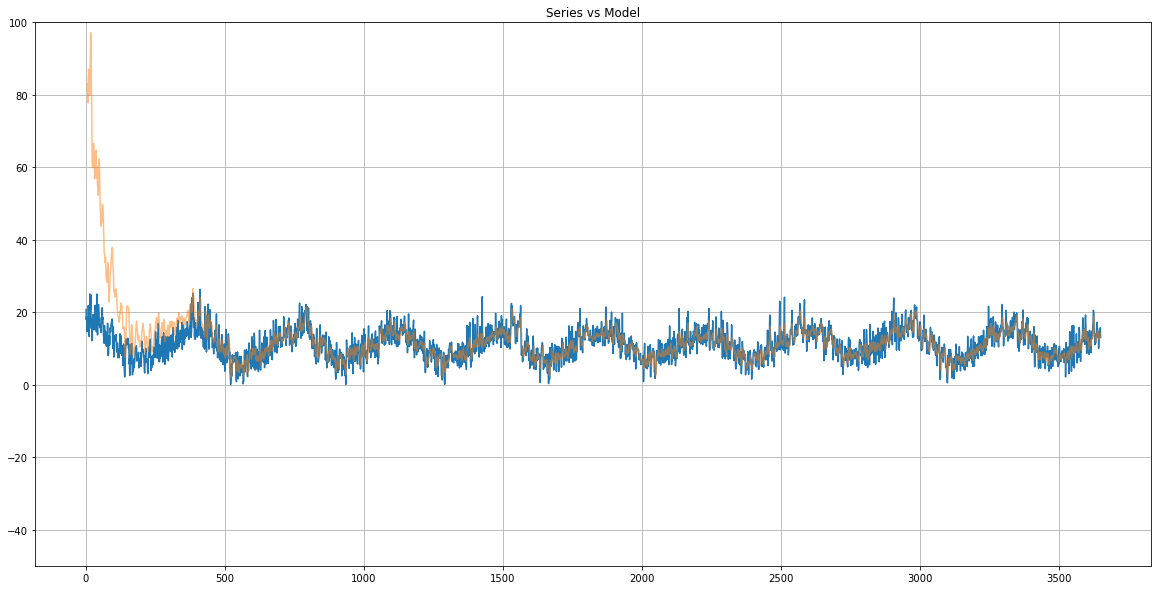

In [49]:
plt.figure(figsize=(20,10))
plt.title("Series vs Model")
plt.plot(x)

y = np.arange(model_order,len(pred_vector)+model_order,1)

plt.plot(y, pred_vector, alpha = 0.5)
plt.grid()

#plt.xlim(0,3000)
plt.ylim(-50,100)
plt.show()

<br><br><br>
# PREDICT

Now I can try to see if I train my model only on a partial dataset how it will predict the future using its own predictions!

In [50]:
max_n = 1000 #maximum number of points on which to train my AR model

error_vector, pred_vector, w, coef_history = AR(x, lr = 0.000005, p=model_order, max_iter = 99999, detrend = False)

Il massimo numero di iterazioni possibili è: 3644 



Now I have obtained the set of weights of my trained model on very few data points

In [51]:
w

[0.2897248014402238,
 0.18586960076545087,
 0.16247705935525095,
 0.1643328428821232,
 0.1871851970997487]

Now the question is "Will it be able to generate new data in a meaningful way?"

I have to use the observations past my model (AR of order n needs n points to generate prediction)

Can it predict the future "predited_lenght" observations?

In [52]:
new_data = x[max_n:max_n+model_order]
new_data

predicted_lenght = 100

for i in range(predicted_lenght):
    prediction = np.sum(w*new_data[-model_order:])
    new_data = np.append(new_data, prediction)

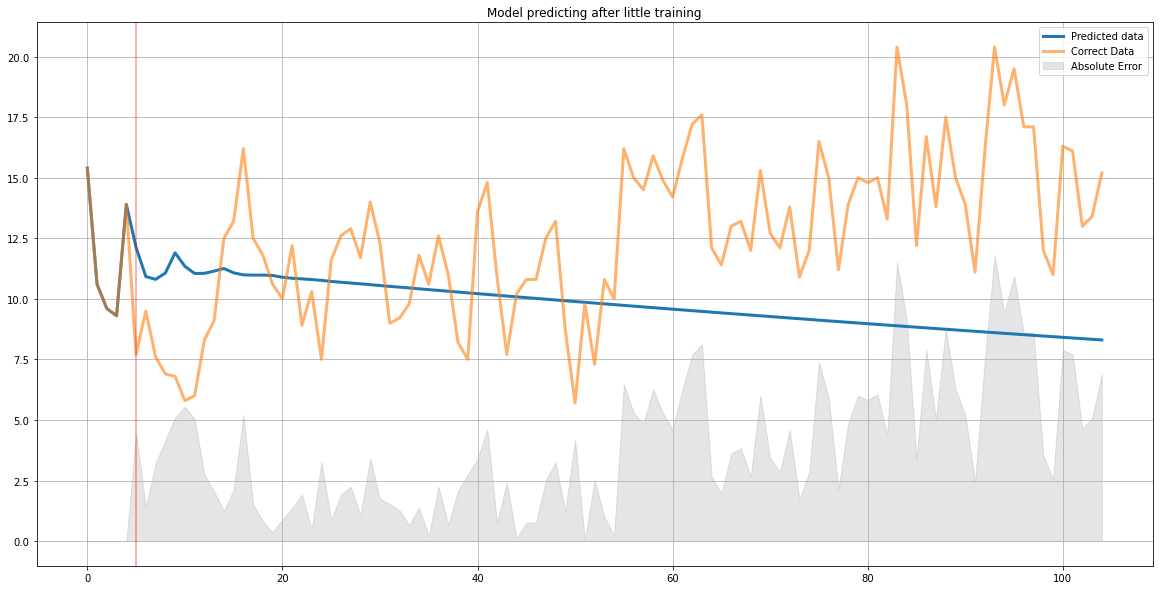

In [56]:
plt.figure(figsize=(20,10))
plt.title("Model predicting after little training")

plt.plot(new_data, lw = 3, label="Predicted data")
plt.plot(x[max_n:max_n+predicted_lenght+model_order], alpha = 0.6, lw =3, label="Correct Data")

plt.fill_between(range(len(new_data)), np.abs(x[max_n:max_n+predicted_lenght+model_order]-new_data), 0, alpha = 0.2, color="gray", label="Absolute Error")


plt.legend()
plt.axvline(model_order, color="red", alpha = 0.3, lw=2)
plt.grid()

plt.show()

Conclusion: no, it is not able to generalize

<br><br><br>


# OLD STUFF

In [660]:
def AR(x):
    
    """
    AR Model of order 2
    """
    
    p = 2 #model order
    w = [1,1] #initialize weights
    reg = 0.0001
    error_vector = [] #initialize error vector
    pred_vector = []
    w_1 = []
    
    max_iter = 3600
    
    for i in range(max_iter):
        
        w_1.append(w[0])
        
        y_pred = w[0]*x[i+p] + w[1]*x[i-1+p]
        pred_vector.append(y_pred)
        
        error = (x[i+1+p] - y_pred)**2 #Sum Of Squared Errors
        error_vector.append(error)
        
        #Update weights "w" using gradient descent
        w[0] = w[0] - reg*2*(x[i+1+p]-y_pred)*(-x[i+p])
        w[1] = w[1] - reg*2*(x[i+1+p]-y_pred)*(-x[i-1+p])
        
    return error_vector, pred_vector, w_1
    
    

In [661]:
def AR(x, lr):
    
    """
    AR Model of order 4
    lr #learning rate
    """
    
    p = 4 #model order
    w = [1,1,1,1] #initialize weights
    coef_history = []
    
    error_vector = [] #initialize error vector
    pred_vector = []

    
    max_iter = 3600
    
    for i in range(max_iter):
        
        coef_history.append([w[0], w[1], w[2], w[3]])
        
        y_pred = w[0]*x[i+p] + w[1]*x[i-1+p] + w[2]*x[i-2+p] + w[3]*x[i-3+p]
        pred_vector.append(y_pred)
        
        error = (x[i+1+p] - y_pred)**2 #Sum Of Squared Errors (in questo caso dovrebbe coincidere con l'MSE perchè sto facendo una sola osservazione come errore => scalare!)
        error_vector.append(error)
        
        #Update weights "w" using gradient descent
        w[0] = w[0] - lr*2*(x[i+1+p]-y_pred)*(-x[i+p])
        w[1] = w[1] - lr*2*(x[i+1+p]-y_pred)*(-x[i-1+p])
        w[2] = w[2] - lr*2*(x[i+1+p]-y_pred)*(-x[i-2+p])
        w[3] = w[3] - lr*2*(x[i+1+p]-y_pred)*(-x[i-3+p])
        
    return error_vector, pred_vector, w, coef_history
    
    